0.031400000000000004


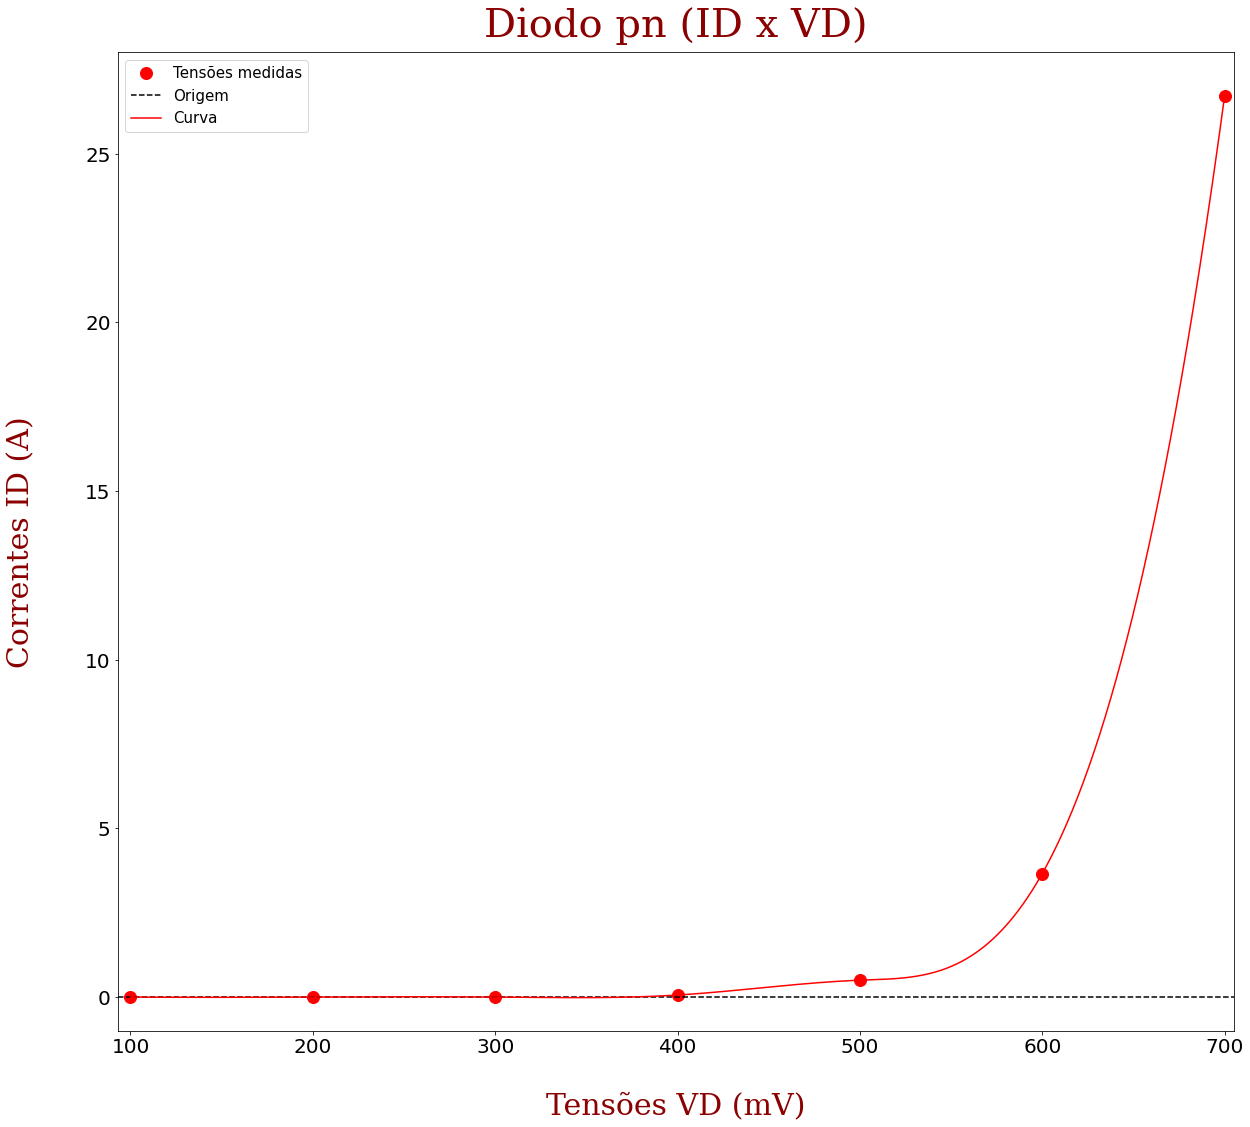

In [19]:
import math  as ma
import numpy as np
import sympy as sy
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
import pandas as pd

#unidades
m,k = 10**-3,10**3

V_m = np.array([100.0,200.0,300.0,400.0,500.0,600.0,700.0])
I_m = np.array([0,0,0,0.06,0.50,3.66,26.70])

#Data frame (tabela simples nesse caso)
d = {'V'  :V_m,'I': I_m}  #dicinario com os valores dados por um array 
the_df = pd.DataFrame(data = d ,index = None)
df_reset=the_df.set_index(list(d.keys()))    #tirando os indices , .keys retorna  um tipo dict_key com as chaves do dicionario, pra usar coverto dict_key em list 
df_reset

#grafico da cuva 
#interpolei para ter mais pontos para ter uma curva mais suave
x = V_m
y = I_m
new_length = 1000
new_x = np.linspace(x.min(), x.max(), new_length)
new_y = interpolate.interp1d(x, y,kind='cubic')(new_x) #ao que parece tenho que tomar cuidado em escolher o x certo para 'cubic'

#regressão linear
A = np.vstack([x, np.ones(len(x))]).T  #tansfoma eum  matriz como a primieta coluna igual a x, a segunda 1
m, c = np.linalg.lstsq(A, y, rcond=None)[0]  #m e o coeficiente , c o erro (y = mx + c)
#grafico

font1 = {'family':'serif','color':'black','size':40}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure( figsize=(20, 18))#Altura o tamanho da imagem 
fig1 = plt.plot(x,y, 'ro', label='Original data', markersize=12) #grafico bem elaborado com pontos e tamanho 10 
plt.axhline(y=0, color="black", linestyle="--")
plt.tick_params(labelsize=20)
plt.title('Diodo pn (ID x VD)',fontsize=40,fontdict = font2, y=1.01)#y = altura(padrão 1 )
plt.xlabel('Tensões VD (mV)',fontsize=30,fontdict = font2,labelpad=35)
plt.ylabel('Correntes ID (A)',fontsize=30,fontdict = font2,labelpad=50)
plt.axis([ 93, 705,-1,28,]) # [xmin, xmax, ymin, ymax]
fig2 = plt.plot(new_x,new_y, 'r-', label='Original data', markersize=5) #interpolação
#fig3 = plt.plot(x, m*x + c, 'b', label='Fitted line')

print(m)
plt.legend(['Tensões medidas', 'Origem', 'Curva','Regreção Linear'], loc=2,fontsize =15)
plt.show()